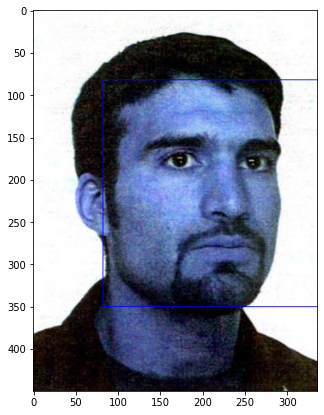

In [223]:
import os
import random
import matplotlib.pyplot as plt
path = f"./raw/2002/08/31/big/{random.choice(os.listdir('./raw/2002/08/31/big/'))}"
import face_recognition
image = face_recognition.load_image_file(path)
face_locations = face_recognition.face_locations(image)
import cv2

for fl in face_locations:
    color = (0, 0, 255)
    image_path = path
    image = cv2.imread(image_path)
    pt1 = (int(fl[1]), int(fl[2]))
    pt2 = (int(fl[3]), int(fl[0]))
    cv2.rectangle(image, pt1, pt2, color)
    plt.figure(figsize=(10,7))
    plt.imshow(image)
    plt.show()

In [85]:
import pandas as pd
import pandas_read_xml as xmlpd

In [2]:
from detectron2.utils.visualizer import BoxMode

In [3]:
import cv2

In [4]:
with open('./raw/FDDB-fold-10-ellipseList.txt','r') as file:
    for line in file.readlines()[:6]:
        if line == str(line):
            print(line)

2002/08/31/big/img_18008

4

53.968100 38.000000 -1.494904 31.598276 55.596600  1

56.000000 37.000000 -1.460399 202.152999 122.034200  1

54.558400 39.000000 1.396263 293.611040 133.853600  1

44.000000 34.000000 -1.442216 391.131100 168.266900  1



In [ ]:
import cv2


# Visualizing the data
color = (0, 0, 255) # RED
image_path = "./raw/2002/08/31/big/img_18008.jpg"
image = cv2.imread(image_path)
pt1 = (int(53.968100), int(38.000000))
pt2 = (int(-1.494904), int(31.598276))
cv2.rectangle(image, pt1, pt2, color)
cv2.imshow("Visualization bounding box", image)
cv2.waitKey()

In [11]:
import torch,torchvision
from detectron2.config import get_cfg
from detectron2.data import DatasetCatalog,MetadataCatalog,build_detection_test_loader
from detectron2.engine import DefaultPredictor,DefaultTrainer
from detectron2.evaluation import COCOEvaluator,inference_on_dataset
from detectron2.model_zoo import get_config_file,get_checkpoint_url
from detectron2.utils.visualizer import Visualizer
import numpy as np

In [12]:
def load_data(test=False):
    if test:
        return dataset[:250]
    return dataset

In [13]:
classes = ['face']

In [14]:
DatasetCatalog.register('data',lambda : load_data())
MetadataCatalog.get('data').set(thing_classes=classes)
metadata = MetadataCatalog.get('data')
DatasetCatalog.register('test',lambda : load_data(test=True))
MetadataCatalog.get('test').set(thing_classes=classes)
test_metadata = MetadataCatalog.get('test')

In [15]:
import wandb

In [16]:
import matplotlib.pyplot as plt

In [17]:
# torch.cuda.empty_cache()
# wandb.init(sync_tensorboard=True,name='baseline',project='test')
# model = 'COCO-Detection/faster_rcnn_R_101_DC5_3x.yaml'
# cfg = get_cfg()
# cfg.merge_from_file(get_config_file(model))
# cfg.DATASETS.TRAIN = ('data',)
# cfg.DATASETS.TEST = ()
# cfg.MODEL.WEIGHTS = get_checkpoint_url(model)
# cfg.SOLVER.MAX_ITER = 625
# cfg.SOLVER.BASE_LR = 0.00025
# cfg.SOLVER.STEPS = []
# cfg.SOLVER.IMS_PER_BATCH = 2
# cfg.MODEL.ROI_HEADS.NUM_CLASSES = len(classes)
# cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 128
# trainer = DefaultTrainer(cfg)
# trainer.resume_or_load(resume=False)
# trainer.train()
# cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.25
# cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")
# evaluator = COCOEvaluator('data',cfg,False,output_dir='./output/')
# val_loader = build_detection_test_loader(cfg,'data')
# results = inference_on_dataset(trainer.model,val_loader,evaluator)
# wandb.log(results)
# img = cv2.imread('./raw/images/maksssksksss0.png')
# predictor = DefaultPredictor(cfg)
# preds = predictor(img)['instances'].to('cpu')
# v = Visualizer(img[:,:,::-1],metadata=metadata)
# v = v.draw_instance_predictions(preds)
# v = v.get_image()[:,:,::-1]
# wandb.log({'img':wandb.Image(v)})
# plt.figure(figsize=(10,7))
# plt.imshow(v)
# plt.show()

In [18]:
models = [
    'faster_rcnn_R_101_C4_3x.yaml',
    'faster_rcnn_R_101_DC5_3x.yaml',
    'faster_rcnn_R_101_FPN_3x.yaml',
    'faster_rcnn_R_50_C4_1x.yaml',
    'faster_rcnn_R_50_C4_3x.yaml',
    'faster_rcnn_R_50_DC5_1x.yaml',
    'faster_rcnn_R_50_DC5_3x.yaml',
    'faster_rcnn_R_50_FPN_1x.yaml',
    'faster_rcnn_R_50_FPN_3x.yaml',
    'faster_rcnn_X_101_32x8d_FPN_3x.yaml',
    'faster_rcnn_R_101_DC5_3x.yaml'
]

In [19]:
# for model in models:
#     wandb.init(sync_tensorboard=True,name=model,project='test')
#     model = 'COCO-Detection/' + model
#     cfg = get_cfg()
#     cfg.merge_from_file(get_config_file(model))
#     cfg.DATASETS.TRAIN = ('data')
#     cfg.DATASETS.TEST = ()
#     cfg.MODEL.WEIGHTS = get_checkpoint_url(model)
#     cfg.SOLVER.STEPS = []
#     cfg.SOLVER.BASE_LR = 0.00025
#     cfg.SOLVER.MAX_ITER = 625+round(625/2)
#     cfg.SOLVER.IMS_PER_BATCH = 2
#     cfg.MODEL.ROI_HEADS.NUM_CLASSES = len(classes)
#     cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 128
#     trainer = DefaultTrainer(cfg)
#     trainer.resume_or_load(resume=False)
#     trainer.train()
#     cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.475
#     cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")
#     evaluator = COCOEvaluator('test',cfg,False,output_dir='./output/')
#     val_loader = build_detection_test_loader(cfg,'test')
#     results = inference_on_dataset(trainer.model,val_loader,evaluator)
#     wandb.log(results)
#     img = cv2.imread(f'./raw/images/{os.listdir("./raw/images/")[0]}')
#     predictor = DefaultPredictor(cfg)
#     preds = predictor(img)['instances'].to('cpu')
#     v = Visualizer(img[:,:,::-1],metadata=metadata)
#     v = v.draw_instance_predictions(preds)
#     v = v.get_image()[:,:,::-1]
#     wandb.log({'img':wandb.Image(v)})
#     wandb.finish()

In [20]:
# torch.cuda.empty_cache()
# wandb.init(sync_tensorboard=True,name='test',project='test')
# model = 'COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml'
# cfg = get_cfg()
# cfg.merge_from_file(get_config_file(model))
# cfg.DATASETS.TRAIN = ('data',)
# cfg.DATASETS.TEST = ()
# cfg.MODEL.WEIGHTS = get_checkpoint_url(model)
# cfg.SOLVER.MAX_ITER = 2500
# cfg.SOLVER.BASE_LR = 0.00025
# cfg.SOLVER.STEPS = []
# cfg.SOLVER.IMS_PER_BATCH = 2
# cfg.MODEL.ROI_HEADS.NUM_CLASSES = len(classes)
# cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 128
# trainer = DefaultTrainer(cfg)
# trainer.resume_or_load(resume=False)
# trainer.train()
# cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.25
# cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")
# evaluator = COCOEvaluator('data',cfg,False,output_dir='./output/')
# val_loader = build_detection_test_loader(cfg,'data')
# results = inference_on_dataset(trainer.model,val_loader,evaluator)
# wandb.log(results)
# img = cv2.imread('./raw/images/maksssksksss0.png')
# predictor = DefaultPredictor(cfg)
# preds = predictor(img)['instances'].to('cpu')
# v = Visualizer(img[:,:,::-1],metadata=metadata)
# v = v.draw_instance_predictions(preds)
# v = v.get_image()[:,:,::-1]
# wandb.log({'img':wandb.Image(v)})
# plt.figure(figsize=(10,7))
# plt.imshow(v)
# plt.show()

In [21]:
# BASE_LRS = [0.01,0.001,0.0001,0.00025]
# for BASE_LR in BASE_LRS:
#     model = "COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml"
#     torch.cuda.empty_cache()
#     wandb.init(sync_tensorboard=True,name=f'{BASE_LR}',project='test')
#     torch.cuda.empty_cache()
#     cfg = get_cfg()
#     cfg.merge_from_file(get_config_file(model))
#     cfg.DATASETS.TRAIN = ('data',)
#     cfg.DATASETS.TEST = ()
#     cfg.MODEL.WEIGHTS = get_checkpoint_url(model)
#     cfg.SOLVER.STEPS = []
#     cfg.SOLVER.BASE_LR = BASE_LR
#     cfg.SOLVER.MAX_ITER = 625+round(625/2)
#     cfg.SOLVER.IMS_PER_BATCH = 2
#     cfg.MODEL.ROI_HEADS.NUM_CLASSES = len(classes)
#     cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 128
#     torch.cuda.empty_cache()
#     trainer = DefaultTrainer(cfg)
#     trainer.resume_or_load(resume=False)
#     trainer.train()
#     torch.cuda.empty_cache()
#     cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.475
#     cfg.MODEL.WEIGHTS = "./output/model_final.pth"
#     predictor = DefaultPredictor(cfg)
#     torch.cuda.empty_cache()
#     evaulautor = COCOEvaluator('test',cfg,False,output_dir='./output/')
#     val_loader = build_detection_test_loader(cfg,'test')
#     results = inference_on_dataset(trainer.model,val_loader,evaulautor)
#     torch.cuda.empty_cache()
#     wandb.log(results)
#     for IMG in os.listdir('./raw/images/')[:5]:
#         preds = predictor(cv2.imread('./raw/images/' + IMG))['instances'].to('cpu')
#         v = Visualizer(cv2.imread('./raw/images/' + IMG)[:,:,::-1],metadata=metadata)
#         v = v.draw_instance_predictions(preds)
#         v = v.get_image()[:,:,::-1]
#         wandb.log({IMG:wandb.Image(v)})
#     wandb.finish()

In [22]:
# torch.cuda.empty_cache()
# wandb.init(sync_tensorboard=True,name='test',project='test')
# model = 'COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml'
# cfg = get_cfg()
# cfg.merge_from_file(get_config_file(model))
# cfg.DATASETS.TRAIN = ('data',)
# cfg.DATASETS.TEST = ()
# cfg.MODEL.WEIGHTS = get_checkpoint_url(model)
# cfg.SOLVER.MAX_ITER = 2500
# cfg.SOLVER.BASE_LR = 0.01
# cfg.SOLVER.STEPS = []
# cfg.SOLVER.IMS_PER_BATCH = 2
# cfg.MODEL.ROI_HEADS.NUM_CLASSES = len(classes)
# cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 128
# trainer = DefaultTrainer(cfg)
# trainer.resume_or_load(resume=False)
# trainer.train()
# cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.25
# cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")
# evaluator = COCOEvaluator('data',cfg,False,output_dir='./output/')
# val_loader = build_detection_test_loader(cfg,'data')
# results = inference_on_dataset(trainer.model,val_loader,evaluator)
# wandb.log(results)
# img = cv2.imread('./raw/images/maksssksksss0.png')
# predictor = DefaultPredictor(cfg)
# preds = predictor(img)['instances'].to('cpu')
# v = Visualizer(img[:,:,::-1],metadata=metadata)
# v = v.draw_instance_predictions(preds)
# v = v.get_image()[:,:,::-1]
# wandb.log({'img':wandb.Image(v)})
# plt.figure(figsize=(10,7))
# plt.imshow(v)
# plt.show()

In [23]:
# IMS_PER_BATCHS = [
#     2,
#     3,
#     4,
#     5,
# ]
# for IMS_PER_BATCH in IMS_PER_BATCHS:
#     model = "COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml"
#     BASE_LR = 0.01
#     torch.cuda.empty_cache()
#     wandb.init(sync_tensorboard=True,name=f'{IMS_PER_BATCH}',project='test')
#     torch.cuda.empty_cache()
#     cfg = get_cfg()
#     cfg.merge_from_file(get_config_file(model))
#     cfg.DATASETS.TRAIN = ('data',)
#     cfg.DATASETS.TEST = ()
#     cfg.MODEL.WEIGHTS = get_checkpoint_url(model)
#     cfg.SOLVER.STEPS = []
#     cfg.SOLVER.BASE_LR = BASE_LR
#     cfg.SOLVER.MAX_ITER = 625+round(625/2)
#     cfg.SOLVER.IMS_PER_BATCH = IMS_PER_BATCH
#     cfg.MODEL.ROI_HEADS.NUM_CLASSES = len(classes)
#     cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 128
#     torch.cuda.empty_cache()
#     trainer = DefaultTrainer(cfg)
#     trainer.resume_or_load(resume=False)
#     trainer.train()
#     torch.cuda.empty_cache()
#     cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.475
#     cfg.MODEL.WEIGHTS = "./output/model_final.pth"
#     predictor = DefaultPredictor(cfg)
#     torch.cuda.empty_cache()
#     evaulautor = COCOEvaluator('test',cfg,False,output_dir='./output/')
#     val_loader = build_detection_test_loader(cfg,'test')
#     results = inference_on_dataset(trainer.model,val_loader,evaulautor)
#     torch.cuda.empty_cache()
#     wandb.log(results)
#     for IMG in os.listdir('./raw/images/')[:5]:
#         preds = predictor(cv2.imread('./raw/images/' + IMG))['instances'].to('cpu')
#         v = Visualizer(cv2.imread('./raw/images/' + IMG)[:,:,::-1],metadata=metadata)
#         v = v.draw_instance_predictions(preds)
#         v = v.get_image()[:,:,::-1]
#         wandb.log({IMG:wandb.Image(v)})
#     wandb.finish()

In [24]:
# BATCH_SIZE_PER_IMAGES = [
#     1,
#     8,
#     16,
#     32,
#     64,
#     128,
#     256,
#     512
# ]
# for BATCH_SIZE_PER_IMAGE in BATCH_SIZE_PER_IMAGES:
#     model = "COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml"
#     BASE_LR = 0.01
#     BATCH_SIZE_PER_IMAGE = BATCH_SIZE_PER_IMAGE
#     IMS_PER_BATCH = 
#     torch.cuda.empty_cache()
#     wandb.init(sync_tensorboard=True,name=f'{BATCH_SIZE_PER_IMAGE}',project='test')
#     torch.cuda.empty_cache()
#     cfg = get_cfg()
#     cfg.merge_from_file(get_config_file(model))
#     cfg.DATASETS.TRAIN = ('data',)
#     cfg.DATASETS.TEST = ()
#     cfg.MODEL.WEIGHTS = get_checkpoint_url(model)
#     cfg.SOLVER.STEPS = []
#     cfg.SOLVER.BASE_LR = BASE_LR
#     cfg.SOLVER.MAX_ITER = 625+round(625/2)
#     cfg.SOLVER.IMS_PER_BATCH = IMS_PER_BATCH
#     cfg.MODEL.ROI_HEADS.NUM_CLASSES = len(classes)
#     cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = BATCH_SIZE_PER_IMAGE
#     torch.cuda.empty_cache()
#     trainer = DefaultTrainer(cfg)
#     trainer.resume_or_load(resume=False)
#     trainer.train()
#     torch.cuda.empty_cache()
#     cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.475
#     cfg.MODEL.WEIGHTS = "./output/model_final.pth"
#     predictor = DefaultPredictor(cfg)
#     torch.cuda.empty_cache()
#     evaulautor = COCOEvaluator('test',cfg,False,output_dir='./output/')
#     val_loader = build_detection_test_loader(cfg,'test')
#     results = inference_on_dataset(trainer.model,val_loader,evaulautor)
#     torch.cuda.empty_cache()
#     wandb.log(results)
#     for IMG in os.listdir('./raw/images/')[:5]:
#         preds = predictor(cv2.imread('./raw/images/' + IMG))['instances'].to('cpu')
#         v = Visualizer(cv2.imread('./raw/images/' + IMG)[:,:,::-1],metadata=metadata)
#         v = v.draw_instance_predictions(preds)
#         v = v.get_image()[:,:,::-1]
#         wandb.log({IMG:wandb.Image(v)})
#     wandb.finish()

In [25]:
# max_iters = [631]
# for max_iter in max_iters:
#     max_iter = max_iter
#     torch.cuda.empty_cache()
#     wandb.init(sync_tensorboard=True,name=f'{max_iter}',project='test')
#     model = "COCO-Detection/faster_rcnn_R_50_C4_3x.yaml"
#     cfg = get_cfg()
#     cfg.merge_from_file(get_config_file(model))
#     cfg.DATASETS.TRAIN = ('data',)
#     cfg.DATASETS.TEST = ()
#     cfg.MODEL.WEIGHTS = get_checkpoint_url(model)
#     cfg.SOLVER.MAX_ITER = max_iter
#     cfg.SOLVER.BASE_LR = 0.05
#     cfg.SOLVER.STEPS = []
#     cfg.SOLVER.IMS_PER_BATCH = 2
#     cfg.MODEL.ROI_HEADS.NUM_CLASSES = len(classes)
#     cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 256
#     trainer = DefaultTrainer(cfg)
#     trainer.resume_or_load(resume=False)
#     trainer.train()
#     cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.475
#     cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")
#     try:
#         evaluator = COCOEvaluator('test',cfg,False,output_dir='./output/')
#         val_loader = build_detection_test_loader(cfg,'test')
#         results = inference_on_dataset(trainer.model,val_loader,evaluator)
#         wandb.log(results)
#     except Exception as e:
#         print(e)
#     for img in os.listdir('./raw/images/')[:12]:
#         img = cv2.imread(f'./raw/images/{img}')
#         predictor = DefaultPredictor(cfg)
#         preds = predictor(img)['instances'].to('cpu')
#         v = Visualizer(img[:,:,::-1],metadata=metadata,scale=1)
#         v = v.draw_instance_predictions(preds)
#         v = v.get_image()[:,:,::-1]
#         wandb.log({'img':wandb.Image(v)})
#         plt.figure(figsize=(10,7))
#         plt.imshow(v)
#         plt.show()

wandb: Currently logged in as: ranuga-d (use `wandb login --relogin` to force relogin)


[06/22 11:41:55 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

Skip loading parameter 'roi_heads.box_predictor.cls_score.weight' to the model due to incompatible shapes: (81, 1024) in the checkpoint but (2, 1024) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.cls_score.bias' to the model due to incompatible shapes: (81,) in the checkpoint but (2,) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.bbox_pred.weight' to the model due to incompatible shapes: (320, 1024) in the checkpoint but (4, 1024) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.bbox_pred.bias' to the model due to incompatible shapes: (320,) in the checkpoint but (4,) in the model! You might want to double check if this is expected.


[06/22 11:41:55 d2.engine.train_loop]: Starting training from iteration 0


/home/indika/anaconda3/lib/python3.7/site-packages/detectron2/modeling/roi_heads/fast_rcnn.py:103: UserWarning: This overload of nonzero is deprecated:
	nonzero()
Consider using one of the following signatures instead:
	nonzero(*, bool as_tuple) (Triggered internally at  /pytorch/torch/csrc/utils/python_arg_parser.cpp:882.)
  num_fg = fg_inds.nonzero().numel()


[06/22 11:42:02 d2.utils.events]:  eta: 0:27:55  iter: 19  total_loss: 1.033  loss_cls: 0.661  loss_box_reg: 0.04009  loss_rpn_cls: 0.2604  loss_rpn_loc: 0.02748  time: 0.3386  data_time: 0.0126  lr: 4.9953e-06  max_mem: 2519M
[06/22 11:42:09 d2.utils.events]:  eta: 0:28:17  iter: 39  total_loss: 1.159  loss_cls: 0.6101  loss_box_reg: 0.05462  loss_rpn_cls: 0.4763  loss_rpn_loc: 0.03729  time: 0.3424  data_time: 0.0030  lr: 9.9902e-06  max_mem: 2527M
[06/22 11:42:16 d2.utils.events]:  eta: 0:28:45  iter: 59  total_loss: 1.041  loss_cls: 0.5064  loss_box_reg: 0.06134  loss_rpn_cls: 0.4025  loss_rpn_loc: 0.03732  time: 0.3450  data_time: 0.0027  lr: 1.4985e-05  max_mem: 2527M
[06/22 11:42:24 d2.utils.events]:  eta: 0:28:49  iter: 79  total_loss: 0.9892  loss_cls: 0.4031  loss_box_reg: 0.05336  loss_rpn_cls: 0.3837  loss_rpn_loc: 0.0371  time: 0.3500  data_time: 0.0033  lr: 1.998e-05  max_mem: 2527M
[06/22 11:42:31 d2.utils.events]:  eta: 0:29:25  iter: 99  total_loss: 0.906  loss_cls: 0.

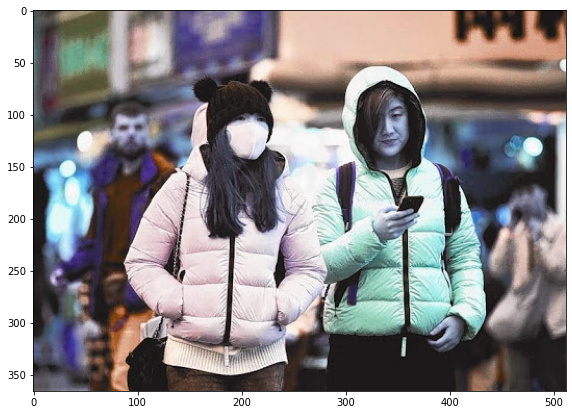

In [26]:
torch.cuda.empty_cache()
wandb.init(sync_tensorboard=True,name='final',project='test')
model = "COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml"
cfg = get_cfg()
cfg.merge_from_file(get_config_file(model))
cfg.DATASETS.TRAIN = ('data',)
cfg.DATASETS.TEST = ()
cfg.MODEL.WEIGHTS = get_checkpoint_url(model)
cfg.SOLVER.MAX_ITER = 5000
cfg.SOLVER.BASE_LR = 0.00025
cfg.SOLVER.STEPS = []
cfg.SOLVER.IMS_PER_BATCH = 2
cfg.MODEL.ROI_HEADS.NUM_CLASSES = len(classes)
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 256
trainer = DefaultTrainer(cfg)
trainer.resume_or_load(resume=False)
trainer.train()
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.475
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")
img = cv2.imread('./raw/images/maksssksksss0.png')
predictor = DefaultPredictor(cfg)
preds = predictor(img)['instances'].to('cpu')
v = Visualizer(img[:,:,::-1],metadata=metadata)
v = v.draw_instance_predictions(preds)
v = v.get_image()[:,:,::-1]
wandb.log({'img':wandb.Image(v)})
plt.figure(figsize=(10,7))
plt.imshow(v)
plt.show()

In [28]:
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.25
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")
for img in os.listdir('./raw/images/')[:25]:
    img = cv2.imread(f'./raw/images/{img}')
    predictor = DefaultPredictor(cfg)
    preds = predictor(img)['instances'].to('cpu')
    v = Visualizer(img[:,:,::-1],metadata=test_metadata)
    v = v.draw_instance_predictions(preds)
    v = v.get_image()[:,:,::-1]
    wandb.log({'img':wandb.Image(v)})
    plt.figure(figsize=(10,7))
    plt.imshow(v)
    plt.show()

FileNotFoundError: [Errno 2] No such file or directory: './raw/images/'

[06/22 11:25:15 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

Skip loading parameter 'roi_heads.box_predictor.cls_score.weight' to the model due to incompatible shapes: (81, 1024) in the checkpoint but (2, 1024) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.cls_score.bias' to the model due to incompatible shapes: (81,) in the checkpoint but (2,) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.bbox_pred.weight' to the model due to incompatible shapes: (320, 1024) in the checkpoint but (4, 1024) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.bbox_pred.bias' to the model due to incompatible shapes: (320,) in the checkpoint but (4,) in the model! You might want to double check if this is expected.


[06/22 11:25:15 d2.engine.train_loop]: Starting training from iteration 0
[06/22 11:25:22 d2.utils.events]:  eta: 0:13:05  iter: 19  total_loss: 1.377  loss_cls: 0.747  loss_box_reg: 0.05799  loss_rpn_cls: 0.5114  loss_rpn_loc: 0.03515  time: 0.3388  data_time: 0.0146  lr: 4.9953e-06  max_mem: 4282M
[06/22 11:25:30 d2.utils.events]:  eta: 0:14:34  iter: 39  total_loss: 1.447  loss_cls: 0.6691  loss_box_reg: 0.02221  loss_rpn_cls: 0.6135  loss_rpn_loc: 0.05205  time: 0.3522  data_time: 0.0029  lr: 9.9902e-06  max_mem: 4282M
[06/22 11:25:36 d2.utils.events]:  eta: 0:14:19  iter: 59  total_loss: 1.05  loss_cls: 0.5579  loss_box_reg: 0.0284  loss_rpn_cls: 0.4542  loss_rpn_loc: 0.04168  time: 0.3490  data_time: 0.0027  lr: 1.4985e-05  max_mem: 4282M
[06/22 11:25:43 d2.utils.events]:  eta: 0:13:55  iter: 79  total_loss: 1.031  loss_cls: 0.4244  loss_box_reg: 0.03349  loss_rpn_cls: 0.4808  loss_rpn_loc: 0.05911  time: 0.3423  data_time: 0.0027  lr: 1.998e-05  max_mem: 4288M
[06/22 11:25:50 d2

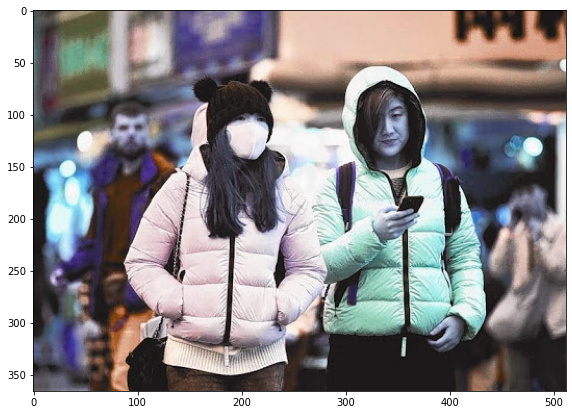

In [27]:
# torch.cuda.empty_cache()
# wandb.init(sync_tensorboard=True,name='final',project='test')
# model = "COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml"
# cfg = get_cfg()
# cfg.merge_from_file(get_config_file(model))
# cfg.DATASETS.TRAIN = ('data',)
# cfg.DATASETS.TEST = ()
# cfg.MODEL.WEIGHTS = get_checkpoint_url(model)
# cfg.SOLVER.MAX_ITER = 2500
# cfg.SOLVER.BASE_LR = 0.00025
# cfg.SOLVER.STEPS = []
# cfg.SOLVER.IMS_PER_BATCH = 2
# cfg.MODEL.ROI_HEADS.NUM_CLASSES = len(classes)
# cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 256
# trainer = DefaultTrainer(cfg)
# trainer.resume_or_load(resume=False)
# trainer.train()
# cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.475
# cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")
# img = cv2.imread('./raw/images/maksssksksss0.png')
# predictor = DefaultPredictor(cfg)
# preds = predictor(img)['instances'].to('cpu')
# v = Visualizer(img[:,:,::-1],metadata=metadata)
# v = v.draw_instance_predictions(preds)
# v = v.get_image()[:,:,::-1]
# wandb.log({'img':wandb.Image(v)})
# plt.figure(figsize=(10,7))
# plt.imshow(v)
# plt.show()

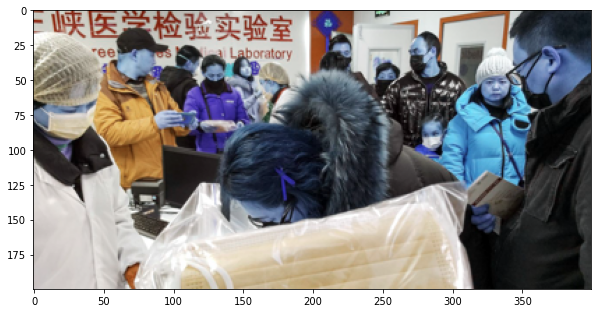

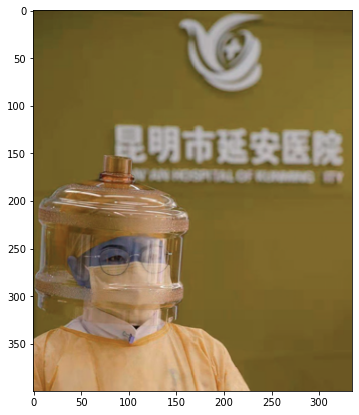

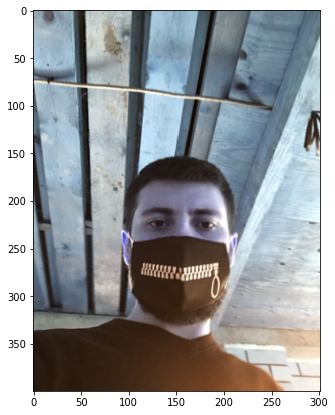

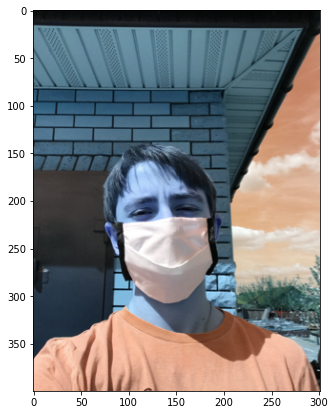

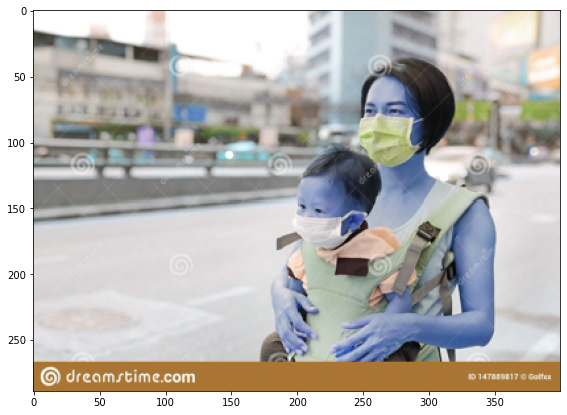

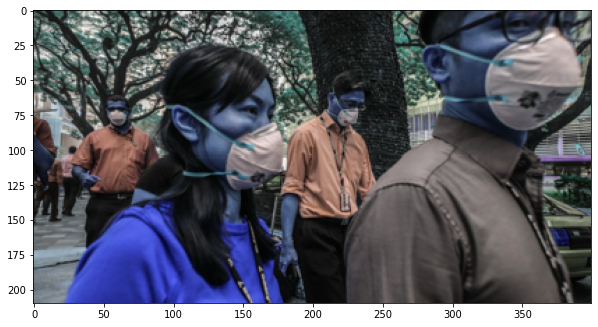

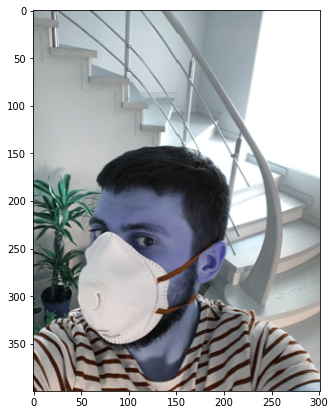

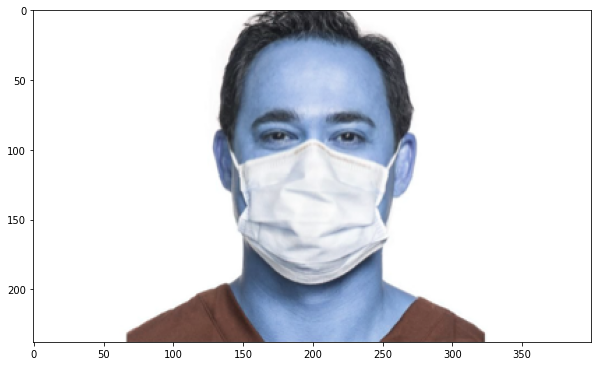

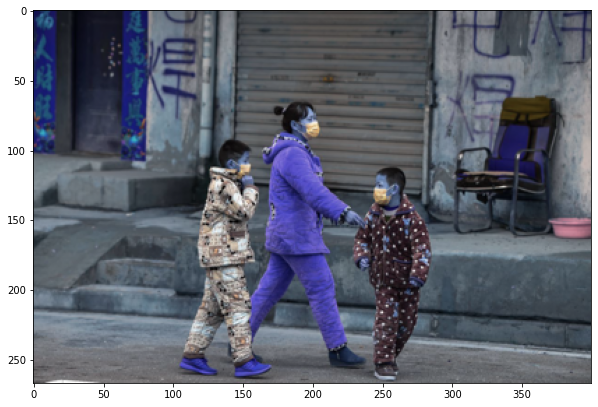

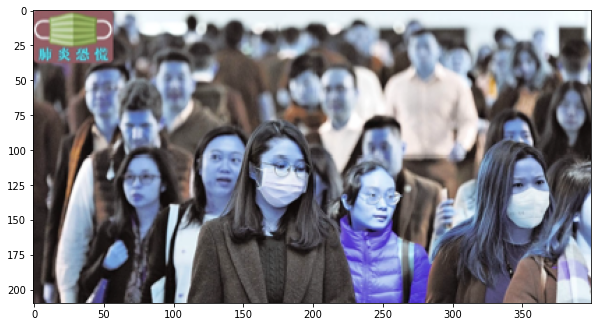

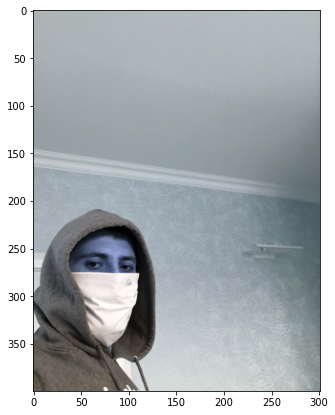

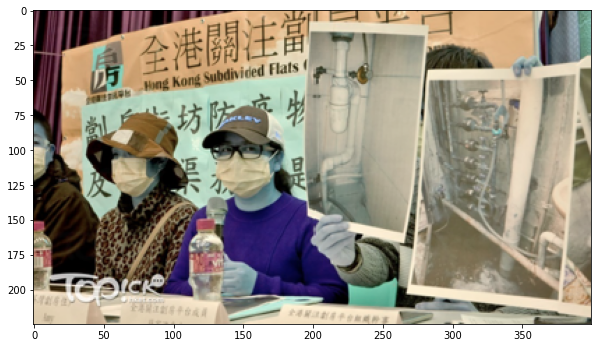

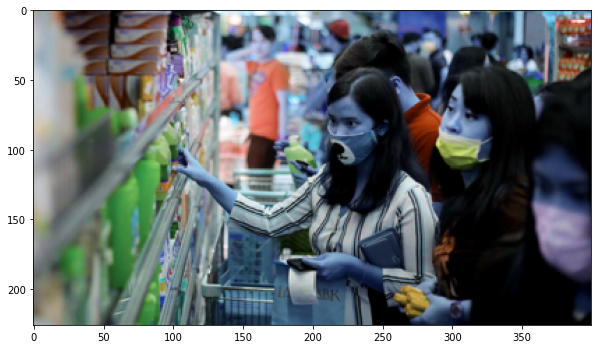

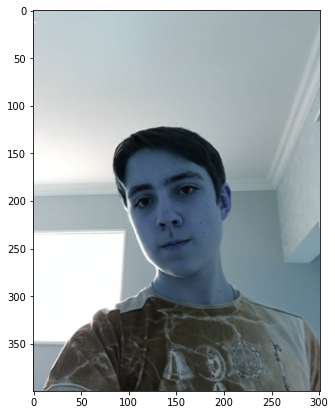

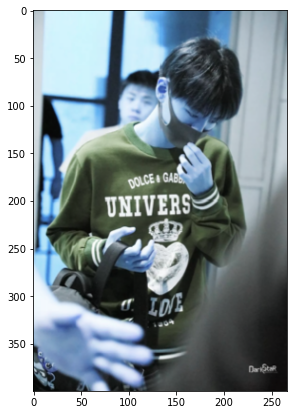

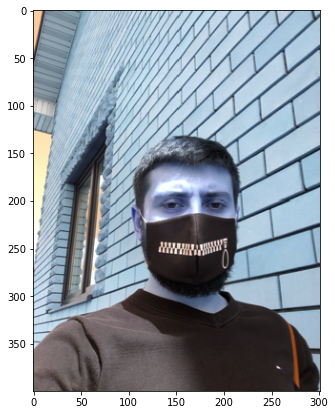

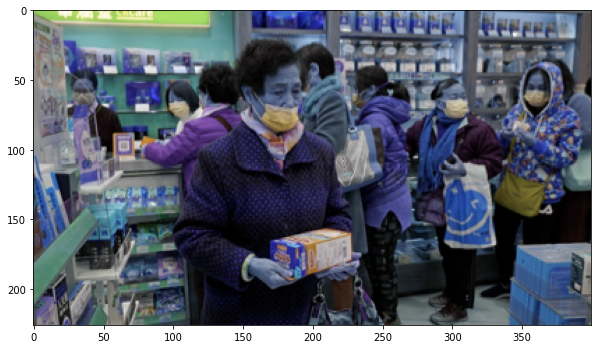

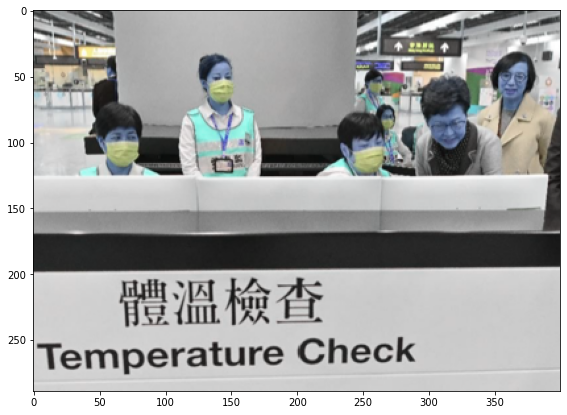

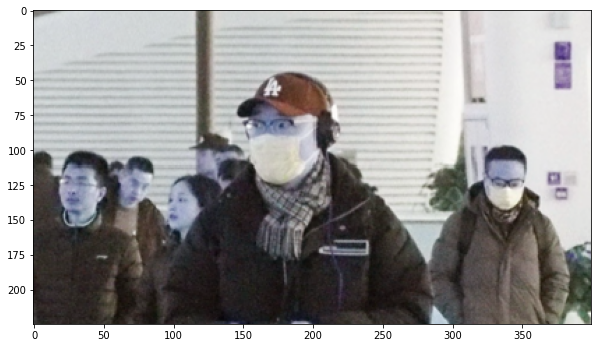

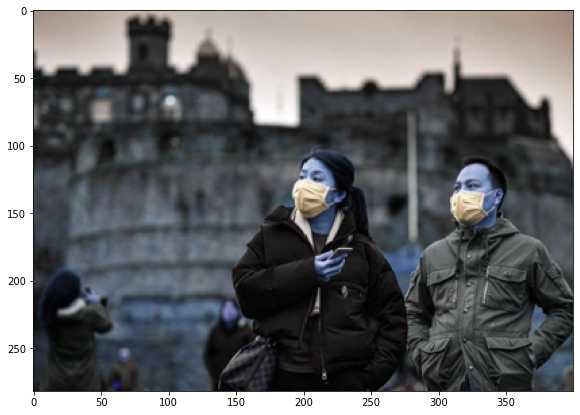

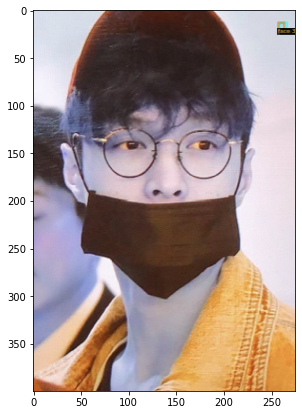

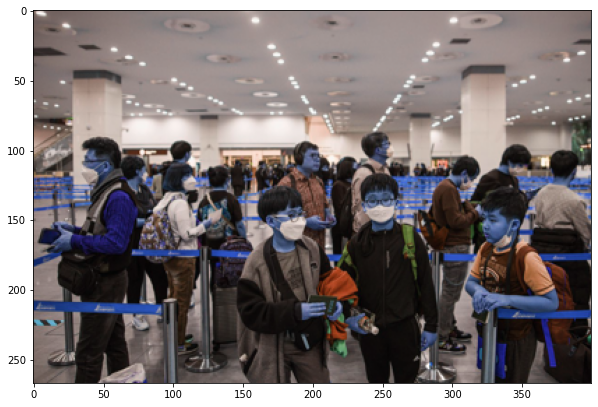

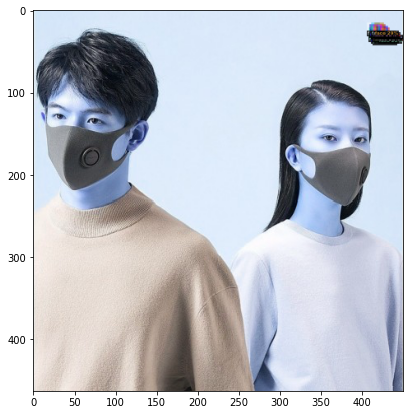

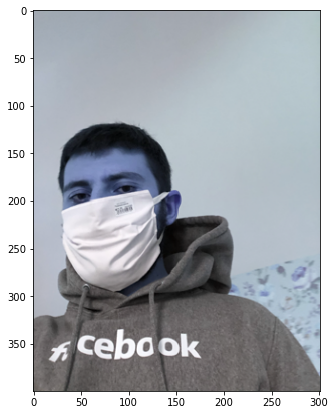

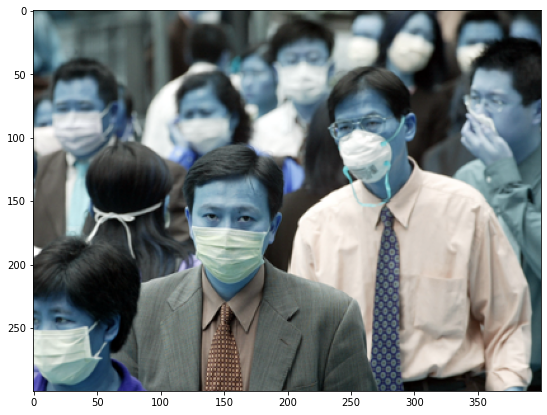

In [28]:
# cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.25
# cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")
# for img in os.listdir('./raw/images/')[:25]:
#     img = cv2.imread(f'./raw/images/{img}')
#     predictor = DefaultPredictor(cfg)
#     preds = predictor(img)['instances'].to('cpu')
#     v = Visualizer(img[:,:,::-1],metadata=metadata)
#     v = v.draw_instance_predictions(preds)
#     v = v.get_image()[:,:,::-1]
#     wandb.log({'img':wandb.Image(v)})
#     plt.figure(figsize=(10,7))
#     plt.imshow(v)
#     plt.show()